In [1]:
# SMS-text dataset from Kaggle

import pandas as pd

data = pd.read_csv("C:\\Users\\bryho\\HOML\\datasets\\spam.csv", encoding="latin-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
import numpy as np

sms = np.array(data)
print(sms[0][1])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [3]:
# remove unused columns and formatting

data = data[['v1','v2']]
data = data.rename(columns={'v1':'label','v2':'text'})
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
# encode labels for eval

data['label'].replace(['ham','spam'],[0,1], inplace=True)
print(data.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [5]:
# 13.4% of sample is spam

print(data['label'].mean())

0.13406317300789664


In [5]:
from nltk.corpus import stopwords

# prepare for processing
stop_words = set(stopwords.words("english"))
print(stop_words)

{'of', 'ain', 'been', 'my', 'again', 'needn', 'by', 'other', 'ours', 'won', 'once', 't', 'at', 'because', 'no', 'm', 'y', 'yours', 'through', 'doing', 'before', "doesn't", 'are', 'couldn', 'and', 'll', 'was', 'mustn', 'shouldn', "you'll", "it's", "she's", 'you', 'nor', 'he', 'can', 'when', 'same', "aren't", 'she', "should've", "shan't", 'here', 'its', 'wasn', "wasn't", 'weren', "won't", 'then', 'as', 'but', 'whom', 'above', 'hadn', 'were', "you're", 'am', 'a', "isn't", 'me', "couldn't", 'hasn', 'out', 'should', 'doesn', "that'll", 'our', 'until', 'from', 'any', 'each', 'why', 'just', 'hers', 'is', 'itself', 'isn', 'about', "hadn't", "haven't", 'had', 'd', 'the', 'so', 're', "mustn't", 'him', 'has', 'below', 'off', "you'd", 'haven', 'theirs', 'where', 'up', 'some', 'both', 'too', 'own', 'mightn', "weren't", 'yourselves', 'on', 'all', 'his', 'your', 'more', "mightn't", 'it', 'most', 'we', 'if', 'with', "shouldn't", 'ourselves', 'now', 'aren', 'over', 'they', 'i', 'did', 'her', 'being', '

In [6]:
# added additional stops after data exploration

more_stops = ['.',',','-','...','!','?',"n't",':',';',"'m",'gt','lt',"''",')',')' "'s"]
stop_words = list(stop_words)

for i in more_stops:
    stop_words.append(i)

In [7]:
import nltk

# tokenize text strings as a list of words
data['token_text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [9]:
import sklearn

print("sklearn version: {}".format(sklearn.__version__))

sklearn version: 0.19.0


In [8]:
# check formatting
print(data['token_text'][0])

['Go', 'until', 'jurong', 'point', ',', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


In [8]:
from collections import Counter

# accrue list of word counts
words = []
for i in data['token_text']:
    words += i

# lower case each word to avoid double counting
words = [w.lower() for w in words if w not in stop_words]

# dict of word counts for dataset
word_counts = Counter(words)
print(word_counts.most_common(150))
print(len(set(words)))

[('i', 1952), ('u', 1118), ('&', 916), ('call', 576), ("'s", 492), ('2', 485), ('get', 385), ('ur', 381), ('you', 340), ('#', 287), ('go', 276), ('free', 275), ('4', 268), ('know', 259), ('ok', 251), ('got', 249), ('like', 244), ('good', 239), ("'ll", 231), ('come', 227), ('time', 214), ('day', 194), ('want', 193), ('send', 191), ('love', 190), ('text', 189), ('no', 184), ('one', 175), ('going', 172), ('txt', 169), ('need', 165), ('how', 162), ('home', 160), ('sorry', 158), ('lor', 156), ('see', 156), ('still', 154), ('r', 153), ('back', 152), ('stop', 150), ('n', 148), ('do', 148), ('today', 145), ('if', 143), ('we', 143), ('reply', 142), ('but', 142), ('da', 140), ('mobile', 138), ('dont', 138), ('tell', 137), ('new', 136), ('later', 133), ('think', 132), ('so', 132), ('take', 131), ('hi', 131), ('just', 128), ('please', 128), ('phone', 126), ('what', 125), ('the', 123), ('my', 123), ('it', 122), ('ì_', 119), ('(', 117), ('week', 117), ('pls', 116), ('your', 116), ('night', 114), ('c

In [9]:
# processing for part of speech
tagged_words = nltk.pos_tag(words)

# hard code pos label for extraction of semantic meaning
def part_of_speech(tag):
    pos = ""
    if (word[1] == 'VB') | (word[1] == 'VBD') | (word[1] == 'VBG') | (word[1] == 'VBN') | (word[1] == 'VBP') | (word[1] == 'VBZ'):
        pos = 'v'
    elif (word[1] == 'RB') | (word[1] == 'RBR') | (word[1] == 'RBS') | (word[1] == 'WRB'):
        pos = 'r'
    elif (word[1] == 'JJ') | (word[1] == 'JJR') | (word[1] == 'JJS'):
        pos = 'a'
    else:
        pos = 'n'
    return pos

In [10]:
from nltk.stem import WordNetLemmatizer

# standardize word frequency as function of pos
lemmatizer = WordNetLemmatizer()

lemmatized_words = []

for word in tagged_words:
    lemmatized_words.append(lemmatizer.lemmatize(word[0], pos=part_of_speech(word[1])))
    
lemma_counts = Counter(lemmatized_words)
print(lemma_counts.most_common(100))
print(len(set(lemmatized_words)))

[('i', 1952), ('u', 1181), ('&', 916), ('get', 692), ('call', 653), ('go', 552), ("'s", 492), ('2', 485), ('ur', 381), ('you', 340), ('come', 322), ('#', 287), ('know', 280), ('free', 275), ('do', 271), ('4', 268), ('be', 266), ('send', 261), ('good', 255), ('like', 254), ('ok', 251), ('want', 243), ('time', 242), ('day', 233), ("'ll", 231), ('say', 226), ('love', 217), ('text', 210), ('tell', 204), ('it', 201), ('think', 195), ('take', 187), ('no', 186), ('need', 185), ('one', 183), ('see', 182), ('make', 173), ('txt', 169), ('today', 164), ('how', 162), ('r', 160), ('home', 160), ('sorry', 158), ('stop', 157), ('reply', 156), ('lor', 156), ('still', 154), ('back', 152), ('c', 149), ('n', 148), ('mobile', 148), ('if', 143), ('we', 143), ('but', 142), ('phone', 141), ('da', 140), ('new', 139), ('dont', 138), ('a', 137), ('well', 136), ('please', 133), ('week', 132), ('so', 132), ('work', 132), ('ask', 132), ('later', 131), ('hi', 131), ('have', 128), ('just', 128), ('what', 125), ('giv

In [11]:
# build vocab of 1,000 most common words
vocabulary = {}

# index vocabulary by word frequency
index = 0
for word in lemma_counts.most_common(1000):
    vocabulary[word[0]] = index
    index +=1
    
# validation check
print(vocabulary['i'])
print(vocabulary["ur"])

0
8


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# feed custom filter and vocabulary to vectorize text
corpus = list(data['text'])
vectorizer = CountVectorizer(stop_words=stop_words, vocabulary=vocabulary)
X = vectorizer.transform(corpus)
y = list(data['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

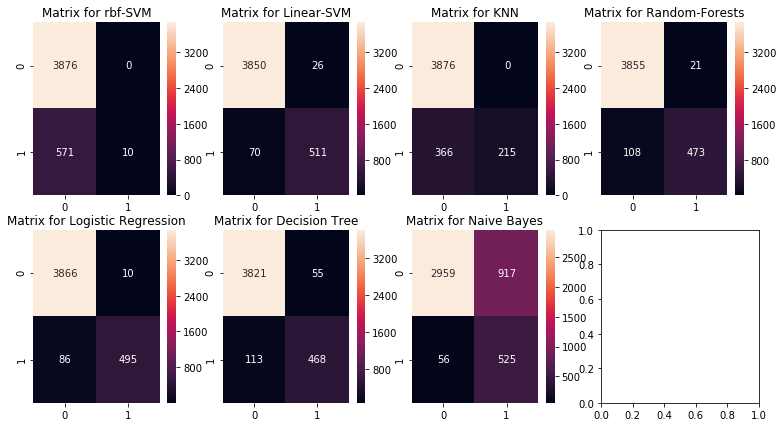

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics


# model training
f_scores = []
p_scores = []
r_scores = []

f,ax=plt.subplots(2,4,figsize=(13,7))
pred = cross_val_predict(svm.SVC(kernel='rbf'),X_train.toarray(),y_train,cv=3)
f_scores.append(metrics.f1_score(y_train, pred))
p_scores.append(metrics.precision_score(y_train, pred))
r_scores.append(metrics.recall_score(y_train, pred))
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
pred = cross_val_predict(svm.SVC(kernel='linear'),X_train.toarray(),y_train,cv=3)
f_scores.append(metrics.f1_score(y_train, pred))
p_scores.append(metrics.precision_score(y_train, pred))
r_scores.append(metrics.recall_score(y_train, pred))
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
pred = cross_val_predict(KNeighborsClassifier(),X_train.toarray(),y_train,cv=3)
f_scores.append(metrics.f1_score(y_train, pred))
p_scores.append(metrics.precision_score(y_train, pred))
r_scores.append(metrics.recall_score(y_train, pred))
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
pred = cross_val_predict(RandomForestClassifier(),X_train.toarray(),y_train,cv=3)
f_scores.append(metrics.f1_score(y_train, pred))
p_scores.append(metrics.precision_score(y_train, pred))
r_scores.append(metrics.recall_score(y_train, pred))
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[0,3],annot=True,fmt='2.0f')
ax[0,3].set_title('Matrix for Random-Forests')
pred = cross_val_predict(LogisticRegression(),X_train.toarray(),y_train,cv=3)
f_scores.append(metrics.f1_score(y_train, pred))
p_scores.append(metrics.precision_score(y_train, pred))
r_scores.append(metrics.recall_score(y_train, pred))
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Logistic Regression')
pred = cross_val_predict(DecisionTreeClassifier(),X_train.toarray(),y_train,cv=3)
f_scores.append(metrics.f1_score(y_train, pred))
p_scores.append(metrics.precision_score(y_train, pred))
r_scores.append(metrics.recall_score(y_train, pred))
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Decision Tree')
pred = cross_val_predict(GaussianNB(),X_train.toarray(),y_train,cv=3)
f_scores.append(metrics.f1_score(y_train, pred))
p_scores.append(metrics.precision_score(y_train, pred))
r_scores.append(metrics.recall_score(y_train, pred))
sns.heatmap(metrics.confusion_matrix(y_train,pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [14]:
classifiers=['RBF Svm','Linear Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
f_ones = pd.DataFrame({'Models': classifiers ,'F1': f_scores, 'Precision': p_scores, 'Recall': r_scores})
f_ones = f_ones[['Models', 'F1', 'Precision', 'Recall']]
f_ones

,Models,F1,Precision,Recall
0,RBF Svm,0.033841,1.000000,0.017212
1,Linear Svm,0.914132,0.951583,0.879518
2,Logistic Regression,0.540201,1.000000,0.370052
3,KNN,0.880000,0.957490,0.814114
4,Decision Tree,0.911602,0.980198,0.851979
5,Naive Bayes,0.847826,0.894837,0.805508
6,Random Forest,0.519031,0.364078,0.903614


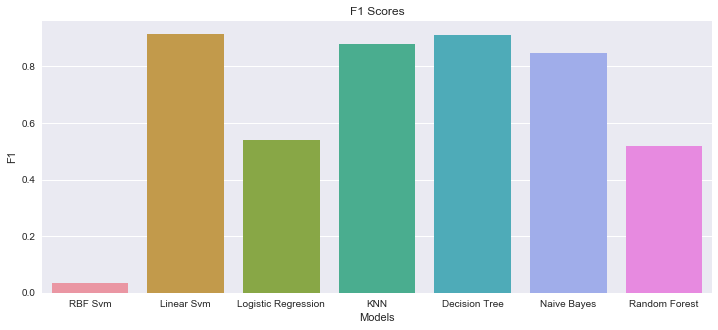

In [17]:
plt.style.use("seaborn")

f,ax=plt.subplots(figsize=(12,5))
sns.barplot('Models', 'F1', data=f_ones, ci=None)
ax.set_title('F1 Scores')
plt.show()

In [38]:
def precision_recall_threshold_plot(precisions, recalls, thresholds, pos="center left"):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc=pos)
    plt.ylim([0,1])

C:\Users\bryho\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "center-left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


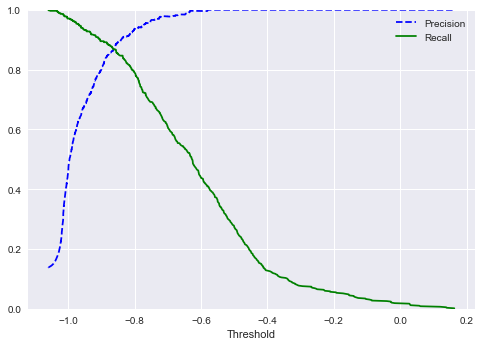

In [23]:
#observed high threshold for some algorithms, leading to high precision with low recall
#next step is plot precision-recall curve for lower threshold value to maintain high precision and raise recall

rbf_scores = cross_val_predict(svm.SVC(kernel='rbf'),X_train.toarray(),y_train,cv=3,method="decision_function")
rbf_scores = rbf_scores[:,1:]
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, rbf_scores)

precision_recall_threshold_plot(precisions, recalls, thresholds)
plt.show()

In [29]:
rbf_pred = (rbf_scores > -0.85)
print('Adjusted RBF SVM f1-score: {:.2f}%'.format(100 * metrics.f1_score(y_train, rbf_pred)))
print("Precision: {:.2f}%".format(100 * metrics.precision_score(y_train, rbf_pred)))
print("Recall: {:.2f}%".format(100 * metrics.recall_score(y_train, rbf_pred)))

Adjusted RBF SVM f1-score: 87.30%
Precision: 89.51%
Recall: 85.20%


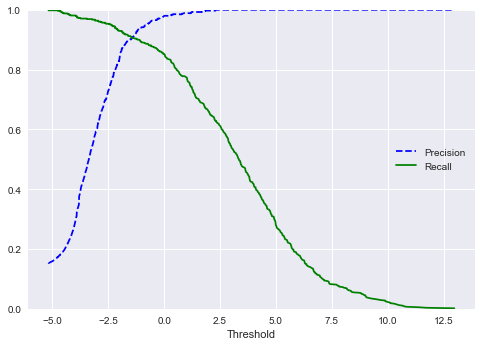

In [39]:
lr_scores = cross_val_predict(LogisticRegression(),X_train.toarray(),y_train,cv=3,method="decision_function")
lr_scores = lr_scores[:,1:]
precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, lr_scores)

precision_recall_threshold_plot(precisions, recalls, thresholds, pos="center right")
plt.show()

In [42]:
lr_pred = (lr_scores > -1.4)
print('Adjusted LR f1-score: {:.2f}%'.format(100 * metrics.f1_score(y_train, lr_pred)))
print("Precision: {:.2f}%".format(100 * metrics.precision_score(y_train, lr_pred)))
print("Recall: {:.2f}%".format(100 * metrics.recall_score(y_train, lr_pred)))

Adjusted LR f1-score: 90.77%
Precision: 91.00%
Recall: 90.53%


In [46]:
#SVM hyperparameter tuning

from sklearn.model_selection import GridSearchCV

Cs = [0.01 ,0.1, 0.25, 0.5]
gammas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
kernels = ["rbf", "linear"]
param_grid = {'C': Cs, 'gamma': gammas, 'kernel':kernels}
grid_search = GridSearchCV(svm.SVC(kernel="linear"), param_grid, cv=3)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'C': 0.25, 'gamma': 0.001, 'kernel': 'linear'}


In [63]:
#linear svm test results

classifiers=['Linear Svm','Decision Tree','KNN', 'Naive Bayes', 'Logistic Regression']
f_scores = []

model = svm.SVC(kernel="linear", C=0.25, gamma=0.001)
model.fit(X_train, y_train)
pred_svm = model.predict(X_test)
f_scores.append(metrics.f1_score(y_test, pred_svm))
print('Linear SVM f1-score: {:.2f}%'.format(100 * metrics.f1_score(y_test, pred_svm)))
print("Precision: {:.2f}%".format(100 * metrics.precision_score(y_test, pred_svm)))
print("Recall: {:.2f}%".format(100 * metrics.recall_score(y_test, pred_svm)))

Linear SVM f1-score: 91.72%
Precision: 97.30%
Recall: 86.75%


In [52]:
#Decision Tree hyperparameter tuning
model = DecisionTreeClassifier()
depth = [2, 4, 6, 8, 10, 12, 15, 20, 25, 30, 40, 50]
param_grid = {"max_depth": depth}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X,y)
print(grid_search.best_params_)

{'max_depth': 25}


In [64]:
#decision tree test results

model = DecisionTreeClassifier(max_depth=25)
model.fit(X_train, y_train)
pred_dt = model.predict(X_test)
f_scores.append(metrics.f1_score(y_test, pred_dt))
print('Decision Tree f1-score: {:.2f}%'.format(100 * metrics.f1_score(y_test, pred_dt)))
print("Precision: {:.2f}%".format(100 * metrics.precision_score(y_test, pred_dt)))
print("Recall: {:.2f}%".format(100 * metrics.recall_score(y_test, pred_dt)))

Decision Tree f1-score: 85.90%
Precision: 94.24%
Recall: 78.92%


In [54]:
#knn hyperparameter tuning
model = KNeighborsClassifier()
neighbors = list(range(1,21,1))
param_grid = {"n_neighbors": neighbors}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'n_neighbors': 1}


In [65]:
#knn test results

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
pred_knn = model.predict(X_test)
f_scores.append(metrics.f1_score(y_test, pred_knn))
print('KNeighbors f1-score: {:.2f}%'.format(100 * metrics.f1_score(y_test, pred_knn)))
print("Precision: {:.2f}%".format(100 * metrics.precision_score(y_test, pred_knn)))
print("Recall: {:.2f}%".format(100 * metrics.recall_score(y_test, pred_knn)))

KNeighbors f1-score: 82.11%
Precision: 98.32%
Recall: 70.48%


In [66]:
#naive bayes test results

model = GaussianNB()
model.fit(X_train.toarray(), y_train)
pred_nb = model.predict(X_test.toarray())
f_scores.append(metrics.f1_score(y_test, pred_nb))
print('GaussianNB f1-score: {:.2f}%'.format(100 * metrics.f1_score(y_test, pred_nb)))
print("Precision: {:.2f}%".format(100 * metrics.precision_score(y_test, pred_nb)))
print("Recall: {:.2f}%".format(100 * metrics.recall_score(y_test, pred_nb)))

GaussianNB f1-score: 51.83%
Precision: 35.78%
Recall: 93.98%


In [67]:
#logistic regression test results

lr_scores = cross_val_predict(LogisticRegression(),X_test.toarray(),y_test,cv=3,method="decision_function")
lr_scores = lr_scores[:,1:]
lr_pred = (lr_scores > -1.4)
f_scores.append(metrics.f1_score(y_test, lr_pred))
print('Log Reg f1-score: {:.2f}%'.format(100 * metrics.f1_score(y_test, lr_pred)))
print("Precision: {:.2f}%".format(100 * metrics.precision_score(y_test, lr_pred)))
print("Recall: {:.2f}%".format(100 * metrics.recall_score(y_test, lr_pred)))

Log Reg f1-score: 85.63%
Precision: 83.43%
Recall: 87.95%


In [68]:
f_ones = pd.DataFrame({'Models': classifiers ,'F': f_scores})
f_ones

,F,Models
0,0.917197,Linear Svm
1,0.859016,Decision Tree
2,0.821053,KNN
3,0.518272,Naive Bayes
4,0.856305,Logistic Regression
